In [3]:
#Cargamos las librerias necesarias:
import pandas as pd
import datetime as dt
import numpy as np
import warnings # nobody likes warnings

import matplotlib.pyplot as plt
import seaborn as sns

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error

pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

In [4]:
# Ponemos los detalles de que contiene cada columna
"""
id: A unique identifier for a house.
date: The date on which the house was sold.
price: The sale price of the house (prediction target).
bedrooms: Number of bedrooms in the house.
bathrooms: Number of bathrooms in the house, per bedroom.
sqft_living: Square footage of the interior living space.
sqft_lot: Square footage of the land space.
floors: Number of floors (levels) in the house.
waterfront: Whether the house has a waterfront view.
view: Number of times the house has been viewed.
condition: The overall condition of the house.
grade: The overall grade given to the house, based on the King County grading system.
sqft_above: Square footage of the house apart from the basement.
sqft_basement: Square footage of the basement.
yr_built: The year the house was built.
yr_renovated: The year the house was renovated.
zipcode: ZIP code area.
lat: Latitude coordinate.
long: Longitude coordinate.
sqft_living15: The interior living space for the nearest 15 neighbors in 2015.
sqft_lot15: The land spaces for the nearest 15 neighbors in 2015.
TARGET --> Price: Our primary focus is to understand which features most significantly impact the house price. 
    Additionally, we aim to explore properties valued at $650K and above for more detailed insights.
"""

'\nid: A unique identifier for a house.\ndate: The date on which the house was sold.\nprice: The sale price of the house (prediction target).\nbedrooms: Number of bedrooms in the house.\nbathrooms: Number of bathrooms in the house, per bedroom.\nsqft_living: Square footage of the interior living space.\nsqft_lot: Square footage of the land space.\nfloors: Number of floors (levels) in the house.\nwaterfront: Whether the house has a waterfront view.\nview: Number of times the house has been viewed.\ncondition: The overall condition of the house.\ngrade: The overall grade given to the house, based on the King County grading system.\nsqft_above: Square footage of the house apart from the basement.\nsqft_basement: Square footage of the basement.\nyr_built: The year the house was built.\nyr_renovated: The year the house was renovated.\nzipcode: ZIP code area.\nlat: Latitude coordinate.\nlong: Longitude coordinate.\nsqft_living15: The interior living space for the nearest 15 neighbors in 2015

In [5]:
#Cargamos el CSV
data = pd.read_csv("king_ country_ houses_aa.csv.zip")

FileNotFoundError: [Errno 2] No such file or directory: 'king_ country_ houses_aa.csv.zip'

In [9]:
#Hacemos una copia del dataset sobre el que trabajaremos para no perder el original
df = data.copy()
df.sample

NameError: name 'data' is not defined

In [157]:
#Sacamos información basica del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [158]:
#Miramos a ver si hay nulos:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [159]:
#Miramos a ver si hay duplicados:
df.duplicated().sum()

0

In [160]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1000102.00,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,75000.00,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370000e+00,9.300000e-01,0.00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.110000e+00,7.700000e-01,0.00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184400e+02,290.00,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,520.00,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.490000e+00,5.400000e-01,1.00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,1.000000e-02,9.000000e-02,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.300000e-01,7.700000e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.410000e+00,6.500000e-01,1.00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [161]:
#Convertimos la columna id en index
df = df.set_index("id")

In [162]:
#Vemos numero de valores distintos de date:
df["date"].nunique()

372

In [163]:
#Vemos los valores de date:
df["date"].unique()

array(['20141013T000000', '20141209T000000', '20150225T000000',
       '20150218T000000', '20140512T000000', '20140627T000000',
       '20150115T000000', '20150415T000000', '20150312T000000',
       '20150403T000000', '20140527T000000', '20140528T000000',
       '20141007T000000', '20150124T000000', '20140731T000000',
       '20140529T000000', '20141205T000000', '20150424T000000',
       '20140514T000000', '20140826T000000', '20140703T000000',
       '20140516T000000', '20141120T000000', '20141103T000000',
       '20140626T000000', '20141201T000000', '20140624T000000',
       '20150302T000000', '20141110T000000', '20141203T000000',
       '20140613T000000', '20141230T000000', '20150213T000000',
       '20140620T000000', '20140715T000000', '20140811T000000',
       '20140707T000000', '20141028T000000', '20140729T000000',
       '20140718T000000', '20150325T000000', '20140716T000000',
       '20150428T000000', '20150311T000000', '20140916T000000',
       '20150217T000000', '20141231T0000

In [164]:
#Pasamos la columna date a formato fecha y ordinal
df["date"] = df["date"].str[0:8].apply(lambda x: dt.datetime.strptime(x,"%Y%m%d").toordinal())
df["date"]

id
7129300520    735519
6414100192    735576
5631500400    735654
2487200875    735576
1954400510    735647
               ...  
263000018     735374
6600060120    735652
1523300141    735407
291310100     735614
1523300157    735521
Name: date, Length: 21613, dtype: int64

In [165]:
#Vemos numero de valores distintos de price:
df.price.nunique()

4028

In [166]:
#Sacamos los numeritos de price:
df.price.describe().round(2)

count      21613.00
mean      540088.14
std       367127.20
min        75000.00
25%       321950.00
50%       450000.00
75%       645000.00
max      7700000.00
Name: price, dtype: float64

In [167]:
#Vemos numero de valores distintos de bedrooms:
df.bedrooms.nunique()

13

In [168]:
#Vemos los valores distintos de bedrooms: (no me gustan los 0 (estudios?), el 33 y los de muy altos en general)
df.bedrooms.value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [169]:
df[df["bedrooms"] == 33]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
2402100895,735409,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [170]:
df[df["bedrooms"] == 11]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
1773100755,735466,520000.0,11,3.0,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,47.556,-122.363,1420,4960


In [171]:
df[df["bedrooms"] == 10]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
627300145,735459,1148000.0,10,5.25,4590,10920,1.0,0,2,3,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
5566100170,735535,650000.0,10,2.00,3610,11914,2.0,0,0,4,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914
8812401450,735596,660000.0,10,3.00,2920,3745,2.0,0,0,4,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745


In [172]:
df[df["bedrooms"] == 0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
6306400140,735396,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3918400017,735634,380000.0,0,0.00,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
1453602309,735450,288000.0,0,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
6896300380,735508,228000.0,0,1.00,390,5900,1.0,0,0,2,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
2954400190,735408,1295650.0,0,0.00,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
2569500210,735554,339950.0,0,2.50,2290,8319,2.0,0,0,3,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
2310060040,735501,240000.0,0,2.50,1810,5669,2.0,0,0,3,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
3374500520,735717,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
7849202190,735590,235000.0,0,0.00,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200


In [173]:
#Vemos numero de valores distintos de bathrooms (se supone que son baños POR habitación, me descuadran estos resultados):
df.bathrooms.nunique()

30

In [174]:
#Vemos los valores de bathrooms: 
df.bathrooms.value_counts()

bathrooms
2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: count, dtype: int64

In [175]:
df[df["bathrooms"] == 0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
6306400140,735396,1095000.0,0,0.0,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3421079032,735646,75000.0,1,0.0,670,43377,1.0,0,0,3,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
3918400017,735634,380000.0,0,0.0,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
5702500050,735541,280000.0,1,0.0,600,24501,1.0,0,0,2,3,600,0,1950,0,98045,47.5316,-121.749,990,22549
2954400190,735408,1295650.0,0,0.0,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
3374500520,735717,355000.0,0,0.0,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
7849202190,735590,235000.0,0,0.0,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
203100435,735494,484000.0,1,0.0,690,23244,1.0,0,0,4,7,690,0,1948,0,98053,47.6429,-121.955,1690,19290
9543000205,735701,139950.0,0,0.0,844,4269,1.0,0,0,4,7,844,0,1913,0,98001,47.2781,-122.250,1380,9600


In [176]:
df.bathrooms.max()

8.0

In [177]:
df[df["bathrooms"] == 8]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
6762700020,735519,7700000.0,6,8.0,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
1225069038,735358,2280000.0,7,8.0,13540,307752,3.0,0,4,3,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800


In [178]:
#Vemos numero de valores distintos de sqft_living
df.sqft_living.nunique()

1038

In [179]:
#Sacamos los numericos para sqft (me llama la atención el minimo: 290sqft son poco menos de 29m2 -- 10sqft es aprox 1m2--)
df.sqft_living.describe().round(2)

count    21613.00
mean      2079.90
std        918.44
min        290.00
25%       1427.00
50%       1910.00
75%       2550.00
max      13540.00
Name: sqft_living, dtype: float64

In [180]:
df[df["sqft_living"] == 290]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
3980300371,735502,142000.0,0,0.0,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850


In [181]:
#Vemos numero de valores distintos de sqft_lot
df.sqft_lot.nunique()

9782

In [182]:
#Sacamos los numericos para sqft_lot (520sqft son poco menos de 52m2 -- 10sqft es aprox 1m2--)
df.sqft_lot.describe().round(2)

count      21613.00
mean       15106.97
std        41420.51
min          520.00
25%         5040.00
50%         7618.00
75%        10688.00
max      1651359.00
Name: sqft_lot, dtype: float64

In [183]:
df[df["sqft_lot"] == 520]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
9828702895,735528,700000.0,4,1.75,2420,520,1.5,0,0,3,7,2420,0,1900,0,98112,47.6209,-122.302,1200,1170


In [184]:
df[df["sqft_lot"] == 1651359]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
1020069017,735684,700000.0,4,1.0,1300,1651359,1.0,0,3,4,6,1300,0,1920,0,98022,47.2313,-122.023,2560,425581


In [185]:
#Vemos numero de valores distintos de floors (los que son x.5 significa que el ultimo piso es más pequeño que el piso inferior)
df.floors.nunique()

6

In [186]:
#Vemos los valores de floors
df.floors.value_counts()

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

In [187]:
#Vemos numero de valores distintos de waterfront (boolean: 0=no 1=si)
df.waterfront.nunique()

2

In [188]:
#Vemos los valores de waterfront
df.waterfront.value_counts()

waterfront
0    21450
1      163
Name: count, dtype: int64

In [189]:
#Vemos numero de valores distintos de view (númer de veces que la casa ha sido vista - no se si nos aporta algún valor)
df.view.nunique()

5

In [190]:
#Vemos los valores de view
df.view.value_counts()

view
0    19489
2      963
3      510
1      332
4      319
Name: count, dtype: int64

In [191]:
#Vemos numero de valores distintos de condition
df.condition.nunique()

5

In [192]:
#Vemos los valores de condition
df.condition.value_counts()

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

In [193]:
#Vemos numero de valores distintos de grade
df.grade.nunique()

12

In [194]:
#Vemos los valores de grade
df.grade.value_counts()

grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64

In [195]:
#Vemos numero de valores distintos de sqft_above
df.sqft_above.nunique()

946

In [196]:
#Sacamos los numericos para sqft_above
df.sqft_above.describe().round(2)

count    21613.00
mean      1788.39
std        828.09
min        290.00
25%       1190.00
50%       1560.00
75%       2210.00
max       9410.00
Name: sqft_above, dtype: float64

In [197]:
#Vemos numero de valores distintos de sqft_basement
df.sqft_basement.nunique()

306

In [198]:
#Sacamos los numericos para sqft_basement
df.sqft_basement.describe().round(2)

count    21613.00
mean       291.51
std        442.58
min          0.00
25%          0.00
50%          0.00
75%        560.00
max       4820.00
Name: sqft_basement, dtype: float64

In [199]:
df[df["sqft_basement"] == 4820]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
1924059029,735401,4668000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.557,-122.21,3270,10454


In [200]:
#Vemos numero de valores distintos de yr_built
df.yr_built.nunique()

116

In [201]:
#Vemos los valores de yr_built
df.yr_built.unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935], dtype=int64)

In [202]:
#Sacamos los numericos para yr_built
df.yr_built.describe().round(2)

count    21613.00
mean      1971.01
std         29.37
min       1900.00
25%       1951.00
50%       1975.00
75%       1997.00
max       2015.00
Name: yr_built, dtype: float64

In [203]:
#Vemos numero de valores distintos de yr_renovated
df.yr_renovated.nunique()

70

In [204]:
#Vemos los valores de yr_renovated
df.yr_renovated.unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944], dtype=int64)

In [205]:
#Vemos los valores de yr_renovated
df.yr_renovated.value_counts()

yr_renovated
0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

In [206]:
#Sacamos los numericos para yr_renovated
df.yr_renovated.describe().round(2)

count    21613.00
mean        84.40
std        401.68
min          0.00
25%          0.00
50%          0.00
75%          0.00
max       2015.00
Name: yr_renovated, dtype: float64

In [207]:
#Vemos numero de valores distintos de zipcode
df.zipcode.nunique()

70

In [208]:
#Vemos los valores de zipcode
df.zipcode.unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

In [209]:
#Vemos los valores de zipcode
df.zipcode.value_counts()

zipcode
98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: count, Length: 70, dtype: int64

In [210]:
#Vemos numero de valores distintos de lat (no sé si nos aporta algún valor)
df.lat.nunique()

5034

In [211]:
#Sacamos los numericos para lat
df.lat.describe().round(2)

count    21613.00
mean        47.56
std          0.14
min         47.16
25%         47.47
50%         47.57
75%         47.68
max         47.78
Name: lat, dtype: float64

In [212]:
#Vemos numero de valores distintos de long (no sé si nos aporta algún valor)
df.long.nunique()

752

In [213]:
#Sacamos los numericos para long
df.long.describe().round(2)

count    21613.00
mean      -122.21
std          0.14
min       -122.52
25%       -122.33
50%       -122.23
75%       -122.12
max       -121.32
Name: long, dtype: float64

In [214]:
#Vemos numero de valores distintos de sqft_living15 (puede aportar algún valor pero no estoy del todo convencido)
df.sqft_living15.nunique()

777

In [215]:
#Sacamos los numericos para sqft_living15
df.sqft_living15.describe().round(2)

count    21613.00
mean      1986.55
std        685.39
min        399.00
25%       1490.00
50%       1840.00
75%       2360.00
max       6210.00
Name: sqft_living15, dtype: float64

In [216]:
#Vemos numero de valores distintos de sqft_lot15 (puede aportar algún valor pero no estoy del todo convencido)
df.sqft_lot15.nunique()

8689

In [217]:
#Sacamos los numericos para sqft_lot15
df.sqft_lot15.describe().round(2)

count     21613.00
mean      12768.46
std       27304.18
min         651.00
25%        5100.00
50%        7620.00
75%       10083.00
max      871200.00
Name: sqft_lot15, dtype: float64

In [218]:
#Movemos la columna price al final
df['price'] = df.pop('price')
df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,,,,
7129300520,735519,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
6414100192,735576,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
5631500400,735654,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
2487200875,735576,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
1954400510,735647,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,735374,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000.0
6600060120,735652,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000.0
1523300141,735407,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101.0


# Checking distributions

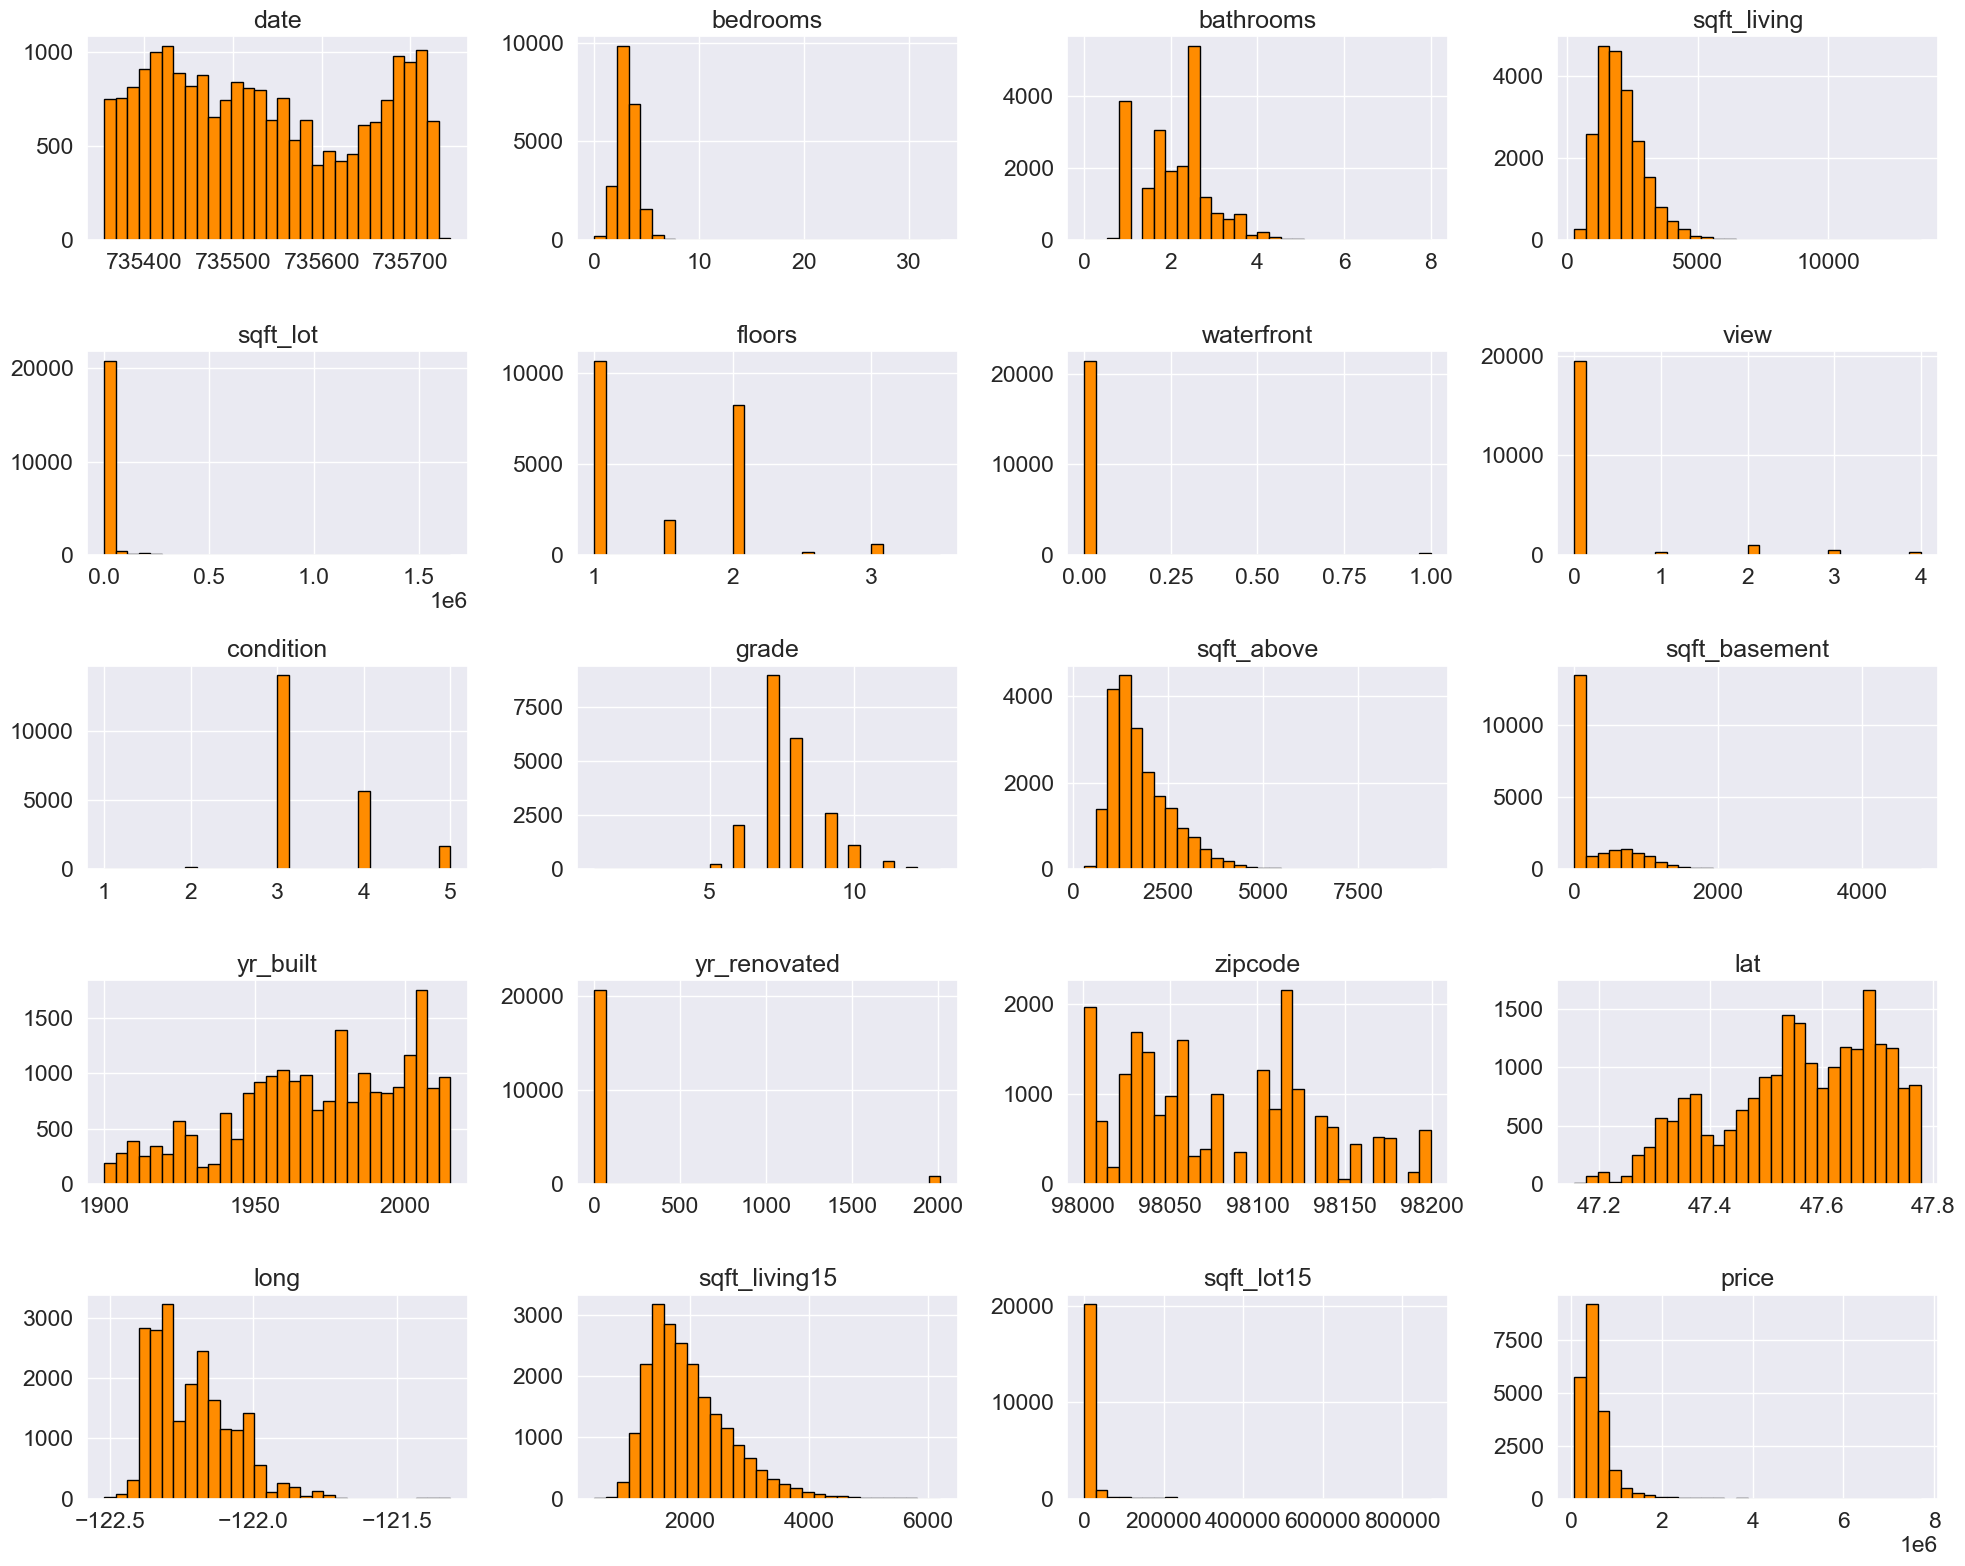

In [219]:
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df.columns[i])

plt.tight_layout()
plt.show()

### Checking target distribution

<Axes: xlabel='price', ylabel='Count'>

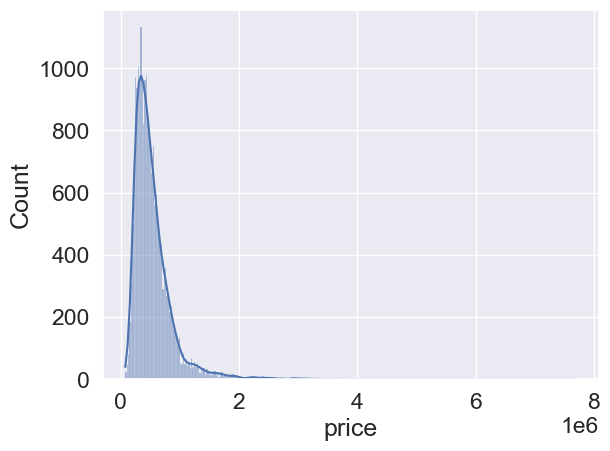

In [220]:
sns.histplot(data=df.price, kde=True)

# Outliers

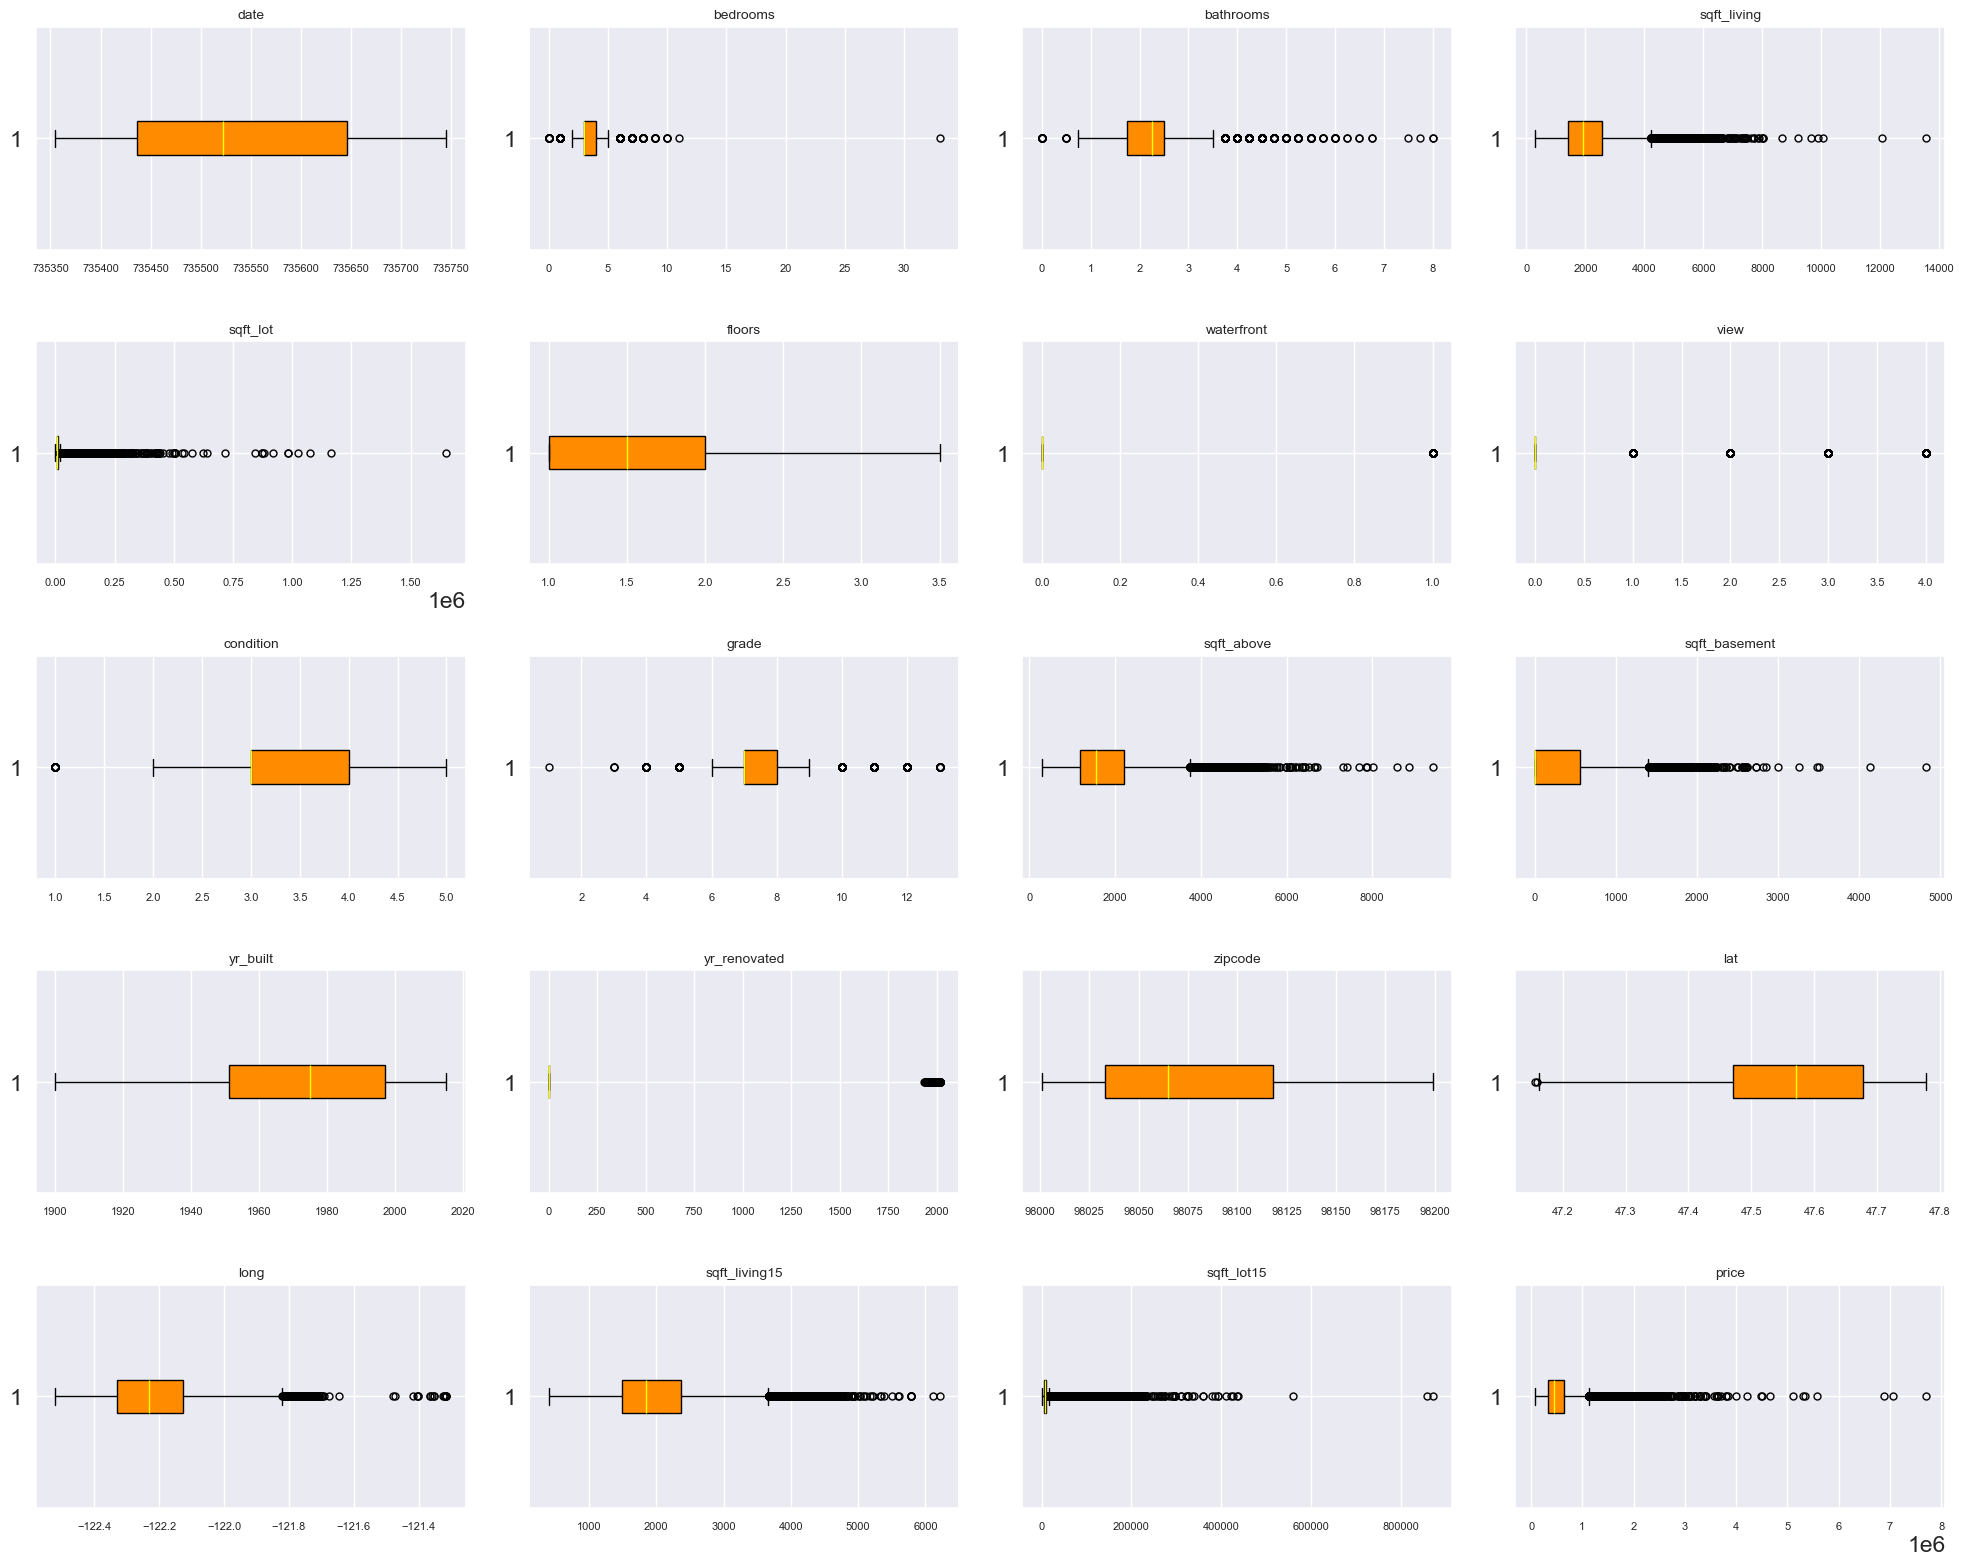

In [221]:
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(df.iloc[:, i].dropna(), vert=False, patch_artist=True,
               whis=1.5, # Ajusta este valor para controlar la longitud de los bigotes 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(df.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

# Correlations

In [222]:
num_corr= df.corr()
num_corr

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
date,1.000000,-0.016800,-0.034410,-0.034559,0.006313,-0.022491,0.001356,-0.001800,-0.050769,-0.039912,-0.027924,-0.019469,-0.000355,-0.024509,0.001404,-0.032856,-0.007020,-0.031515,0.002566,-0.004357
bedrooms,-0.016800,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244,0.308350
bathrooms,-0.034410,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175,0.525138
sqft_living,-0.034559,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286,0.702035
sqft_lot,0.006313,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557,0.089661
floors,-0.022491,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269,0.256794
waterfront,0.001356,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703,0.266369
view,-0.001800,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575,0.397293
condition,-0.050769,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406,0.036362
grade,-0.039912,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248,0.667434


In [223]:
df.corrwith(df["price"]).sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
date            -0.004357
zipcode         -0.053203
dtype: float64

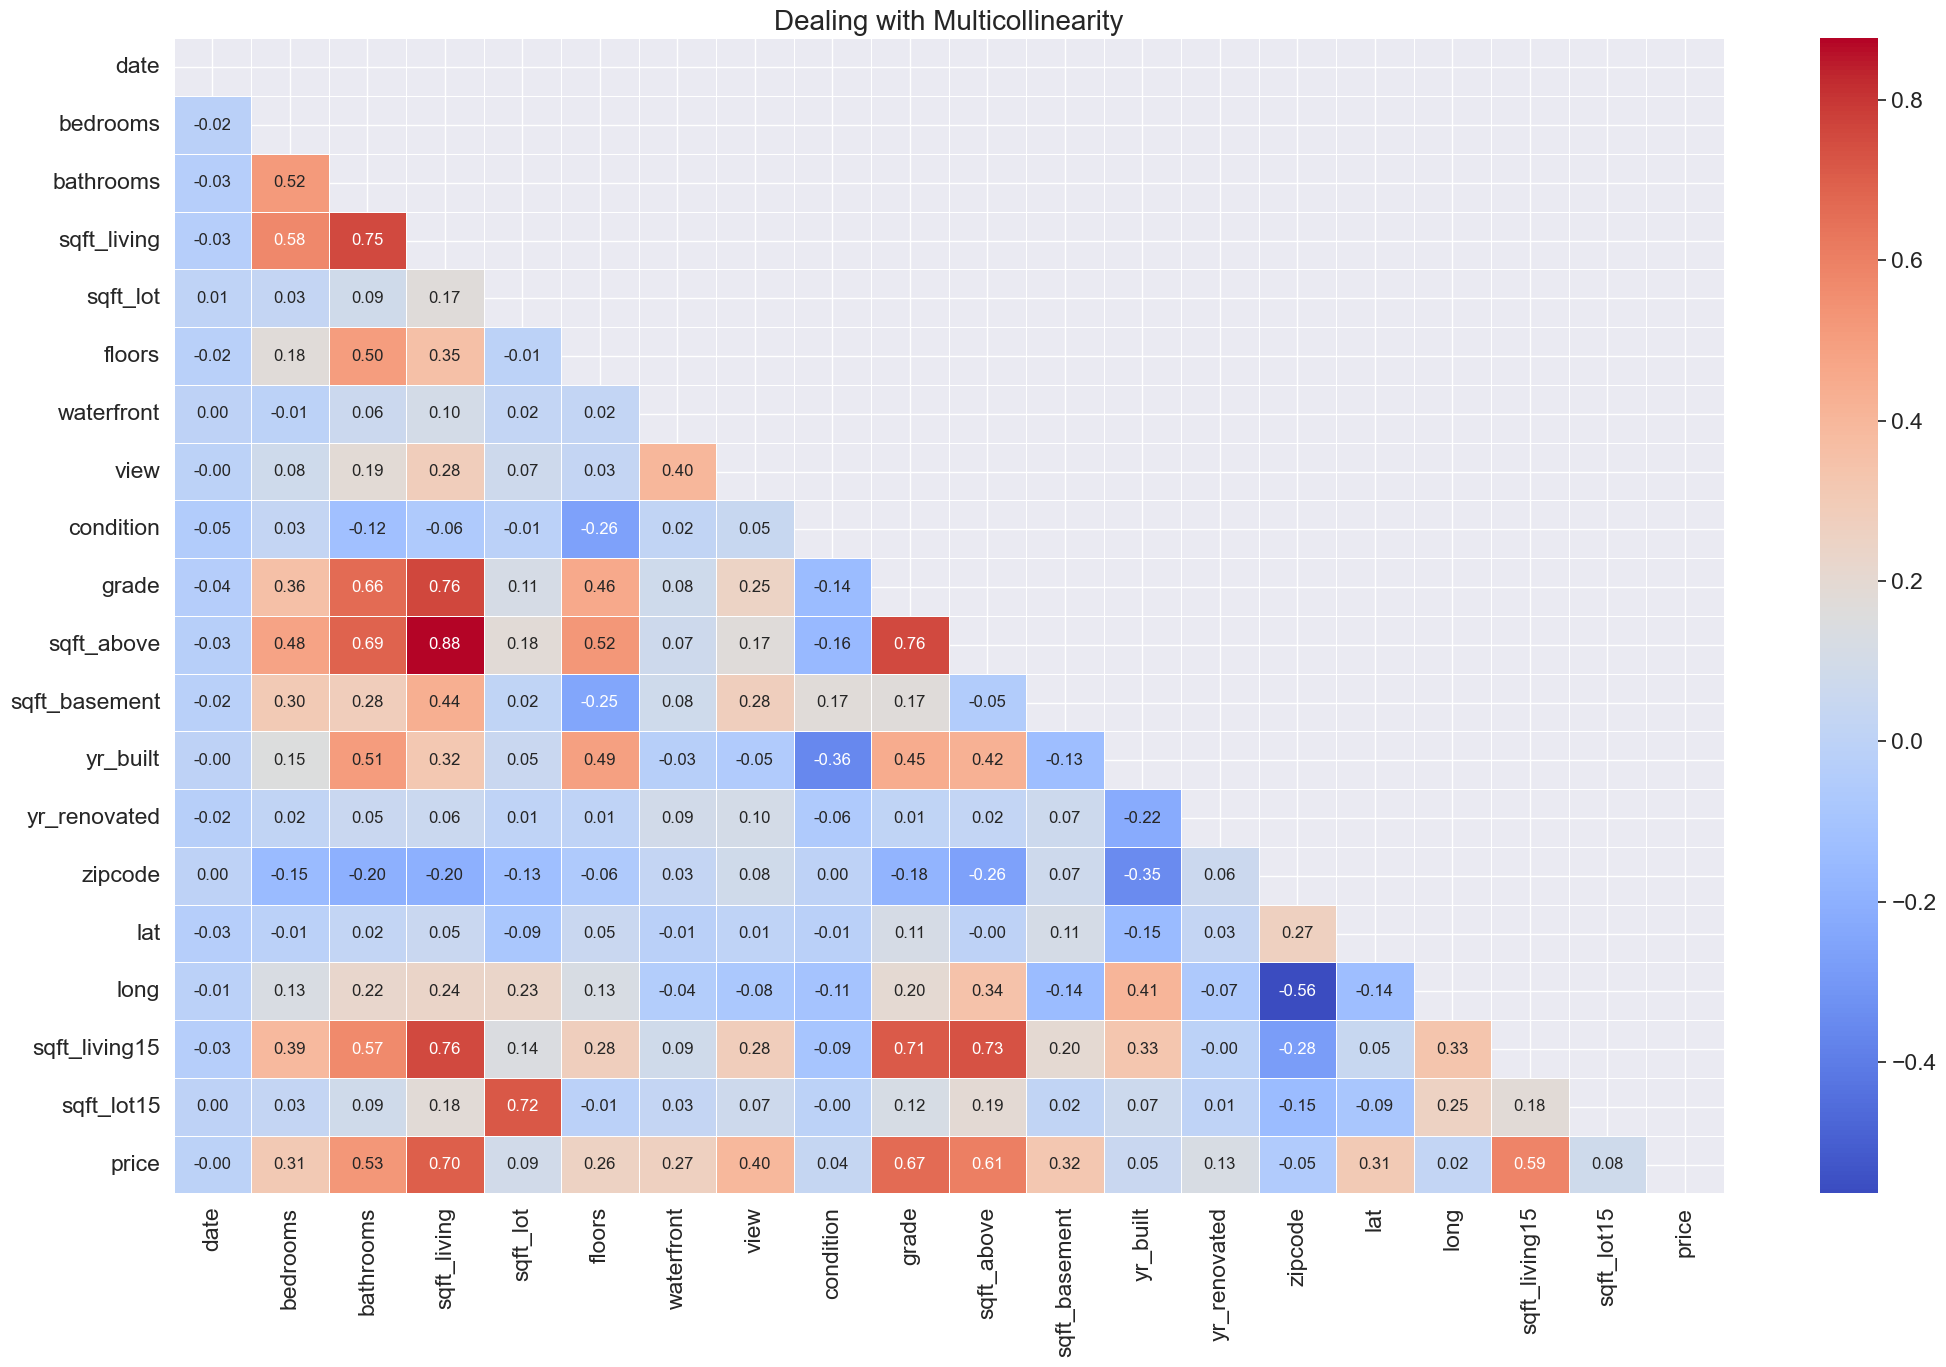

In [224]:
# CSacamos el mapa de calor de las correlaciones
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

# 1º modelo de ML con df

In [225]:
#Hacemos la división del df en y con la columna del targe (dato que queremos predecir) y X que son el resto de columnas
y = df["price"]
X = df.drop(columns="price")

In [226]:
"""
Hacemos el split entre las lineas que le pasamos al modelo para entrenarlo y las que nos guardamos para luego testear el modelo de ML (normalmente 
usaremos el 0.3, que es que nos guardamos el 30%) y para poder replicar los resultados utilimos la "semilla" 42 (podría ser cualquierr otra)
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<h2 style="color: #FF6347;">Selecting the Model: Linear Regression</h2>

In [227]:
#Creamos el "objeto" o "modelo" con el metodo linear regression y lo entrenamos y que luego será el que nos prediga el resultado
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

<h2 style="color: #FF6347;">Model Validation</h2>

In [228]:
#Una vez entrenado le pasamos las lineas que habiamos guardado para testearlo (sin la target) y guardamos los resultados de la predicción
predictions = model.predict(X_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [229]:
#Vemos las diferencias entre lo que ha predicho el modelo y el dato que hmos guardado antes
r2 = r2_score(y_test, predictions)
RMSE = root_mean_squared_error(y_test, predictions)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)

In [230]:
#Printing the results
print("R2 = ", round(r2, 4))
print("RMSE = ", round(RMSE, 4))
print("The value of the metric MSE is ", round(MSE, 4))
print("MAE = ", round(MAE, 4))

R2 =  0.7005
RMSE =  207924.9949
The value of the metric MSE is  43232803513.0735
MAE =  127181.9958


<h1 style="color: #FF8C00;">Improving the Model</h1>

Repetimos el proceso como con el modelo de regresión lineal

<h2 style="color: #FF6347;">Selecting the Model: Ridge Regression</h2>

In [231]:
from sklearn.linear_model import Ridge

In [232]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

<h2 style="color: #FF6347;">Model Validation</h2>

In [233]:
predictions_ridge = ridge.predict(X_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [234]:
r2_ridge = r2_score(y_test, predictions_ridge)
RMSE_ridge = root_mean_squared_error(y_test, predictions_ridge)
MSE_ridge = mean_squared_error(y_test, predictions_ridge)
MAE_ridge = mean_absolute_error(y_test, predictions_ridge)

In [235]:
#Printing the results
print("R2 = ", round(r2_ridge, 4))
print("RMSE = ", round(RMSE_ridge, 4))
print("The value of the metric MSE is ", round(MSE_ridge, 4))
print("MAE = ", round(MAE_ridge, 4))

R2 =  0.7004
RMSE =  207957.9979
The value of the metric MSE is  43246528909.5092
MAE =  127177.6053


<h2 style="color: #FF6347;">Selecting the Model: Lasso Regression</h2>

In [236]:
from sklearn.linear_model import Lasso

In [237]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

<h2 style="color: #FF6347;">Model Validation</h2>

In [238]:
predictions_lasso = lasso.predict(X_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [239]:
r2_lasso = r2_score(y_test, predictions_lasso)
RMSE_lasso = root_mean_squared_error(y_test, predictions_lasso)
MSE_lasso = mean_squared_error(y_test, predictions_lasso)
MAE_lasso = mean_absolute_error(y_test, predictions_lasso)

In [240]:
#Printing the results
print("R2 = ", round(r2_lasso, 4))
print("RMSE = ", round(RMSE_lasso, 4))
print("The value of the metric MSE is ", round(MSE_lasso, 4))
print("MAE = ", round(MAE_lasso, 4))

R2 =  0.7005
RMSE =  207926.1668
The value of the metric MSE is  43233290837.296
MAE =  127181.6045


<h2 style="color: #FF6347;">Selecting the Model: Decision Tree Regression</h2>

In [241]:
from sklearn.tree import DecisionTreeRegressor

In [242]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

<h2 style="color: #FF6347;">Model Validation</h2>

In [243]:
predictions_tree = tree.predict(X_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [244]:
r2_tree = r2_score(y_test, predictions_tree)
RMSE_tree = root_mean_squared_error(y_test, predictions_tree)
MSE_tree = mean_squared_error(y_test, predictions_tree)
MAE_tree = mean_absolute_error(y_test, predictions_tree)

In [245]:
#Printing the results
print("R2 = ", round(r2_tree, 4))
print("RMSE = ", round(RMSE_tree, 4))
print("The value of the metric MSE is ", round(MSE_tree, 4))
print("MAE = ", round(MAE_tree, 4))

R2 =  0.7122
RMSE =  203821.6387
The value of the metric MSE is  41543260384.9102
MAE =  104270.2465


<h2 style="color: #FF6347;">Selecting the Model: KNN Regression</h2>

In [246]:
from sklearn.neighbors import KNeighborsRegressor

In [247]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

<h2 style="color: #FF6347;">Model Validation</h2>

In [248]:
predictions_knn = knn.predict(X_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [249]:
r2_knn = r2_score(y_test, predictions_knn)
RMSE_knn = root_mean_squared_error(y_test, predictions_knn)
MSE_knn = mean_squared_error(y_test, predictions_knn)
MAE_knn = mean_absolute_error(y_test, predictions_knn)

In [250]:
#Printing the results
print("R2 = ", round(r2_knn, 4))
print("RMSE = ", round(RMSE_knn, 4))
print("The value of the metric MSE is ", round(MSE_knn, 4))
print("MAE = ", round(MAE_knn, 4))

R2 =  0.4929
RMSE =  270560.2357
The value of the metric MSE is  73202841141.866
MAE =  164973.8322


<h2 style="color: #FF6347;">Selecting the Model: XGBoost Regression</h2>

In [251]:
import xgboost as xgb

In [252]:
xgbr = xgb.XGBRFRegressor()
xgbr.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

<h2 style="color: #FF6347;">Model Validation</h2>

In [253]:
predictions_xgb = xgbr.predict(X_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [254]:
r2_xgb = r2_score(y_test, predictions_xgb)
RMSE_xgb = root_mean_squared_error(y_test, predictions_xgb)
MSE_xgb = mean_squared_error(y_test, predictions_xgb)
MAE_xgb = mean_absolute_error(y_test, predictions_xgb)

In [255]:
#Printing the results
print("R2 = ", round(r2_xgb, 4))
print("RMSE = ", round(RMSE_xgb, 4))
print("The value of the metric MSE is ", round(MSE_xgb, 4))
print("MAE = ", round(MAE_xgb, 4))

R2 =  0.7662
RMSE =  183729.2413
The value of the metric MSE is  33756434106.1789
MAE =  100045.1877


<h2 style="color: #FF6347;">Final Comparision</h2>

In [256]:
metrics = {
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 'KNN', 'XGBoost'],
    'R²': [r2, r2_ridge, r2_lasso, r2_tree, r2_knn, r2_xgb],
    'RMSE': [RMSE, RMSE_ridge, RMSE_lasso, RMSE_tree, RMSE_knn, RMSE_xgb],
    'MSE': [MSE, MSE_ridge, MSE_lasso, MSE_tree, MSE_knn, MSE_xgb],
    'MAE': [MAE, MAE_ridge, MAE_lasso, MAE_tree, MAE_knn, MAE_xgb]
}

In [257]:
df_metrics = round(pd.DataFrame(metrics),4)
df_metrics.set_index("Model")

,R²,RMSE,MSE,MAE
Model,,,,
Linear Regression,0.7005,207924.9949,4.323280e+10,127181.9958
Ridge,0.7004,207957.9979,4.324653e+10,127177.6053
Lasso,0.7005,207926.1668,4.323329e+10,127181.6045
Decision Tree,0.7122,203821.6387,4.154326e+10,104270.2465
KNN,0.4929,270560.2357,7.320284e+10,164973.8322
XGBoost,0.7662,183729.2413,3.375643e+10,100045.1877


In [258]:
df_metrics.T

,0,1,2,3,4,5
Model,Linear Regression,Ridge,Lasso,Decision Tree,KNN,XGBoost
R²,0.7005,0.7004,0.7005,0.7122,0.4929,0.7662
RMSE,207924.9949,207957.9979,207926.1668,203821.6387,270560.2357,183729.2413
MSE,43232803513.073502,43246528909.509201,43233290837.295998,41543260384.910202,73202841141.865997,33756434106.178902
MAE,127181.9958,127177.6053,127181.6045,104270.2465,164973.8322,100045.1877


# Let's Clean

In [259]:
df2 = df.copy()
df2

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,,,,
7129300520,735519,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
6414100192,735576,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
5631500400,735654,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
2487200875,735576,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
1954400510,735647,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,735374,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000.0
6600060120,735652,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000.0
1523300141,735407,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101.0


In [260]:
#Metemos en la variable drops los index de las casas con 0 habitaciones y 0 baños
drops = df2[(df2["bedrooms"] == 0) & (df2["bathrooms"] == 0)].index
drops

Index([6306400140, 3918400017, 2954400190, 3374500520, 7849202190, 9543000205,
       3980300371],
      dtype='int64', name='id')

In [261]:
#Los dropeamos
df2.drop(index=drops, inplace=True)

In [262]:
#Sobreescribimos en la variable drops los index de la casa con 33 habitaciones
drops = df2[df2["bedrooms"] == 33].index
drops

Index([2402100895], dtype='int64', name='id')

In [263]:
#La dropeamos
df2.drop(index=drops, inplace=True)

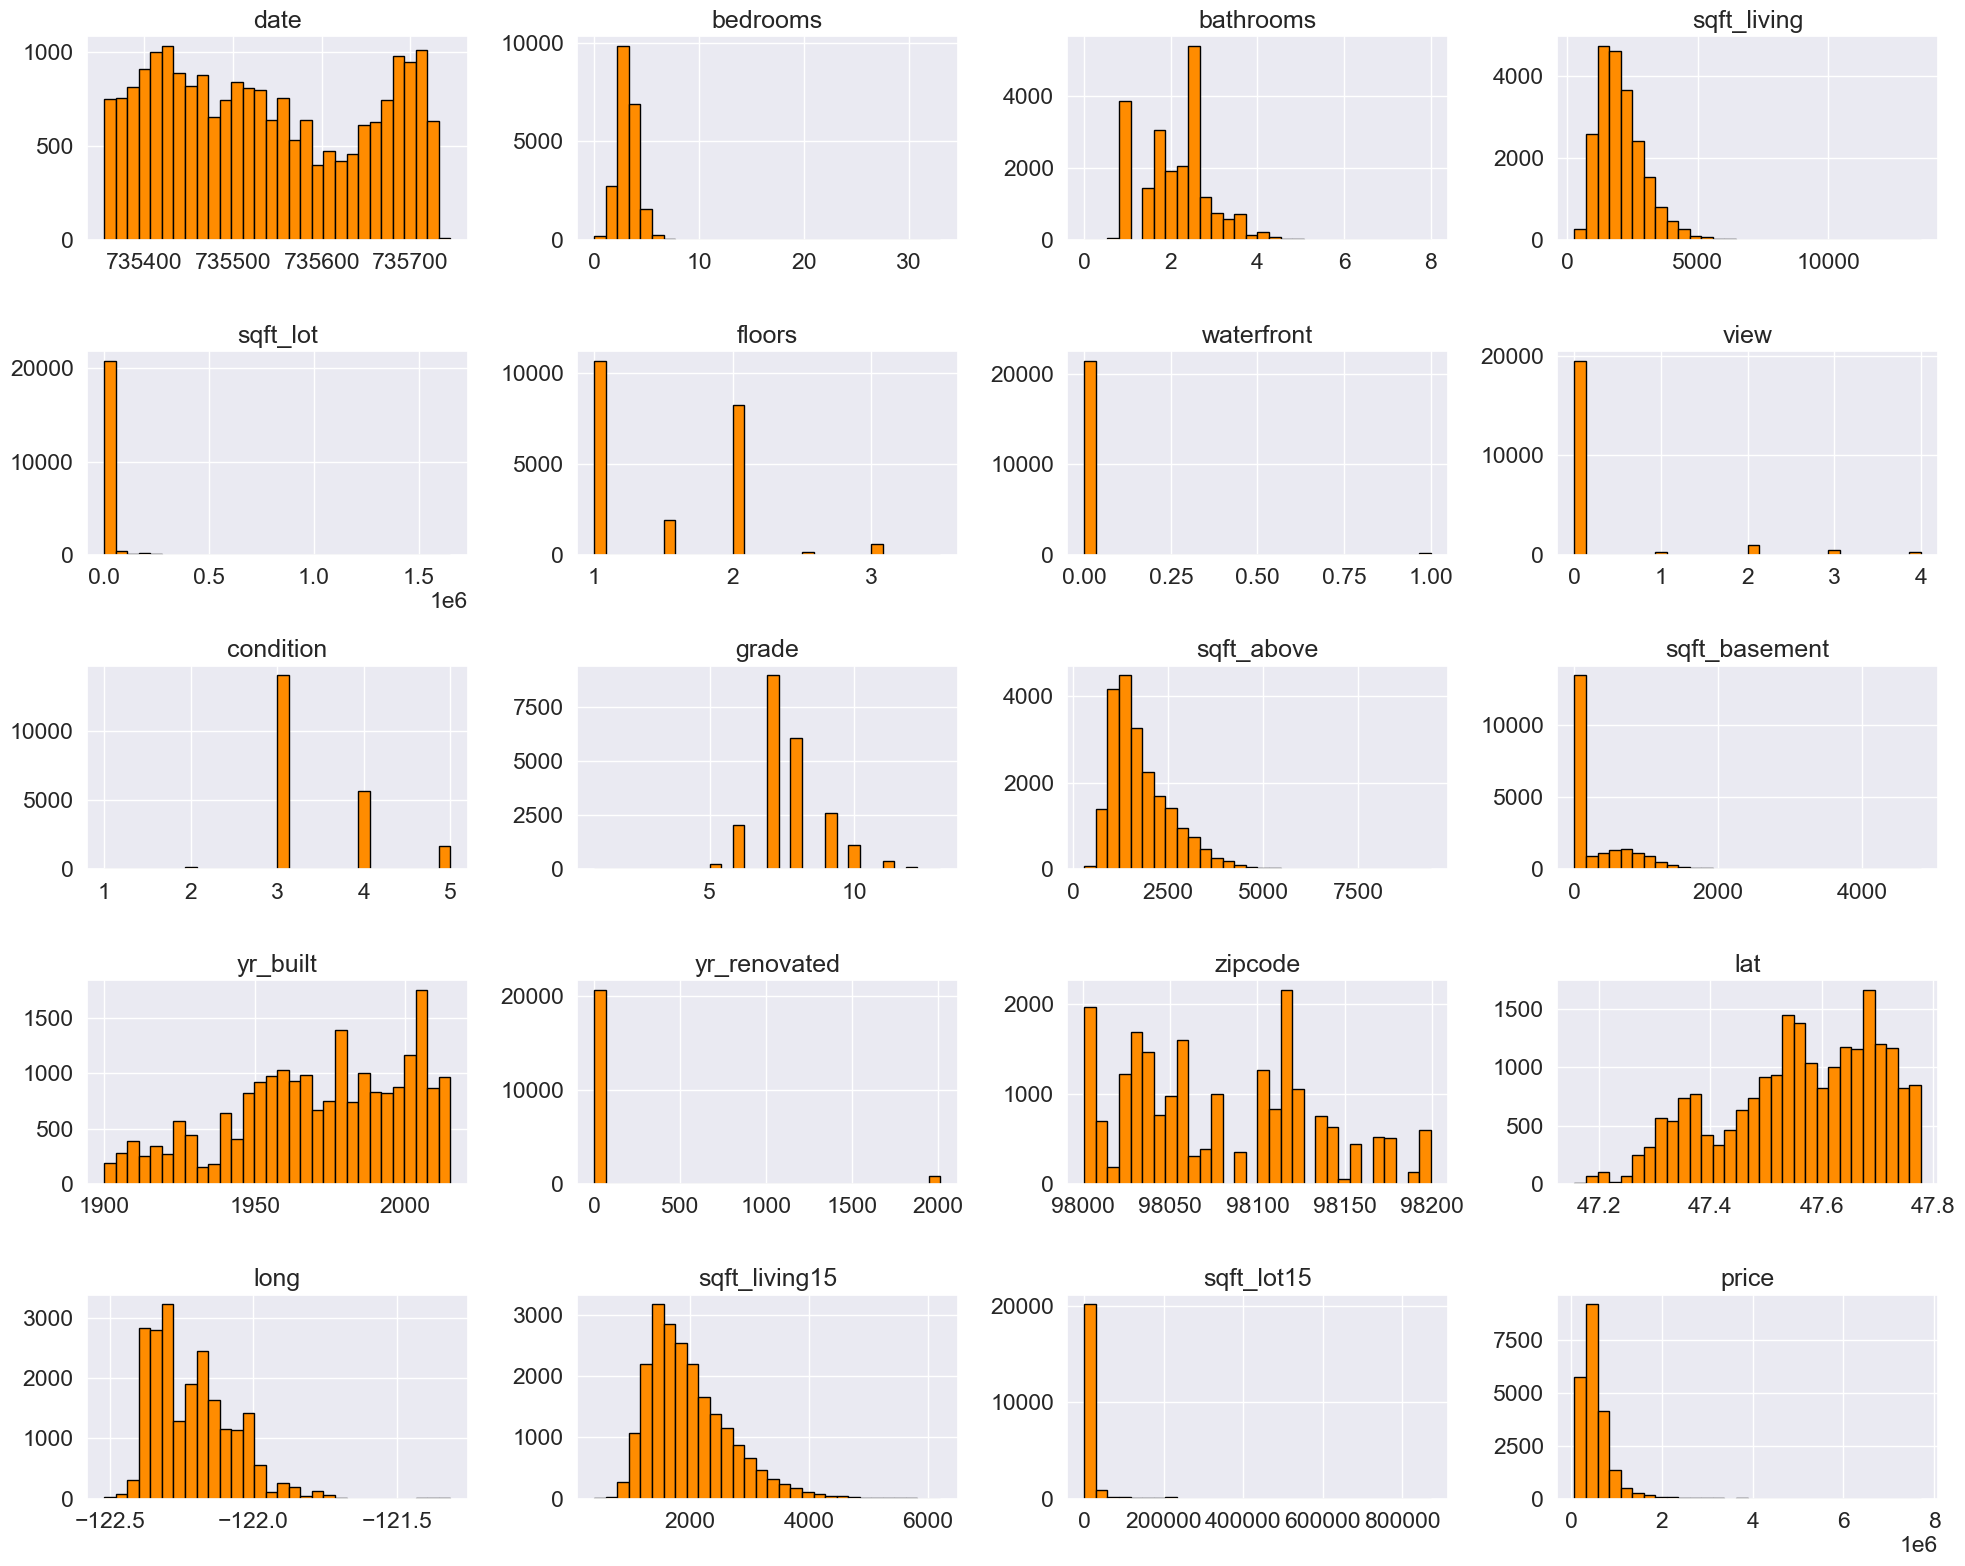

In [264]:
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df2.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df2.columns[i])

plt.tight_layout()
plt.show()

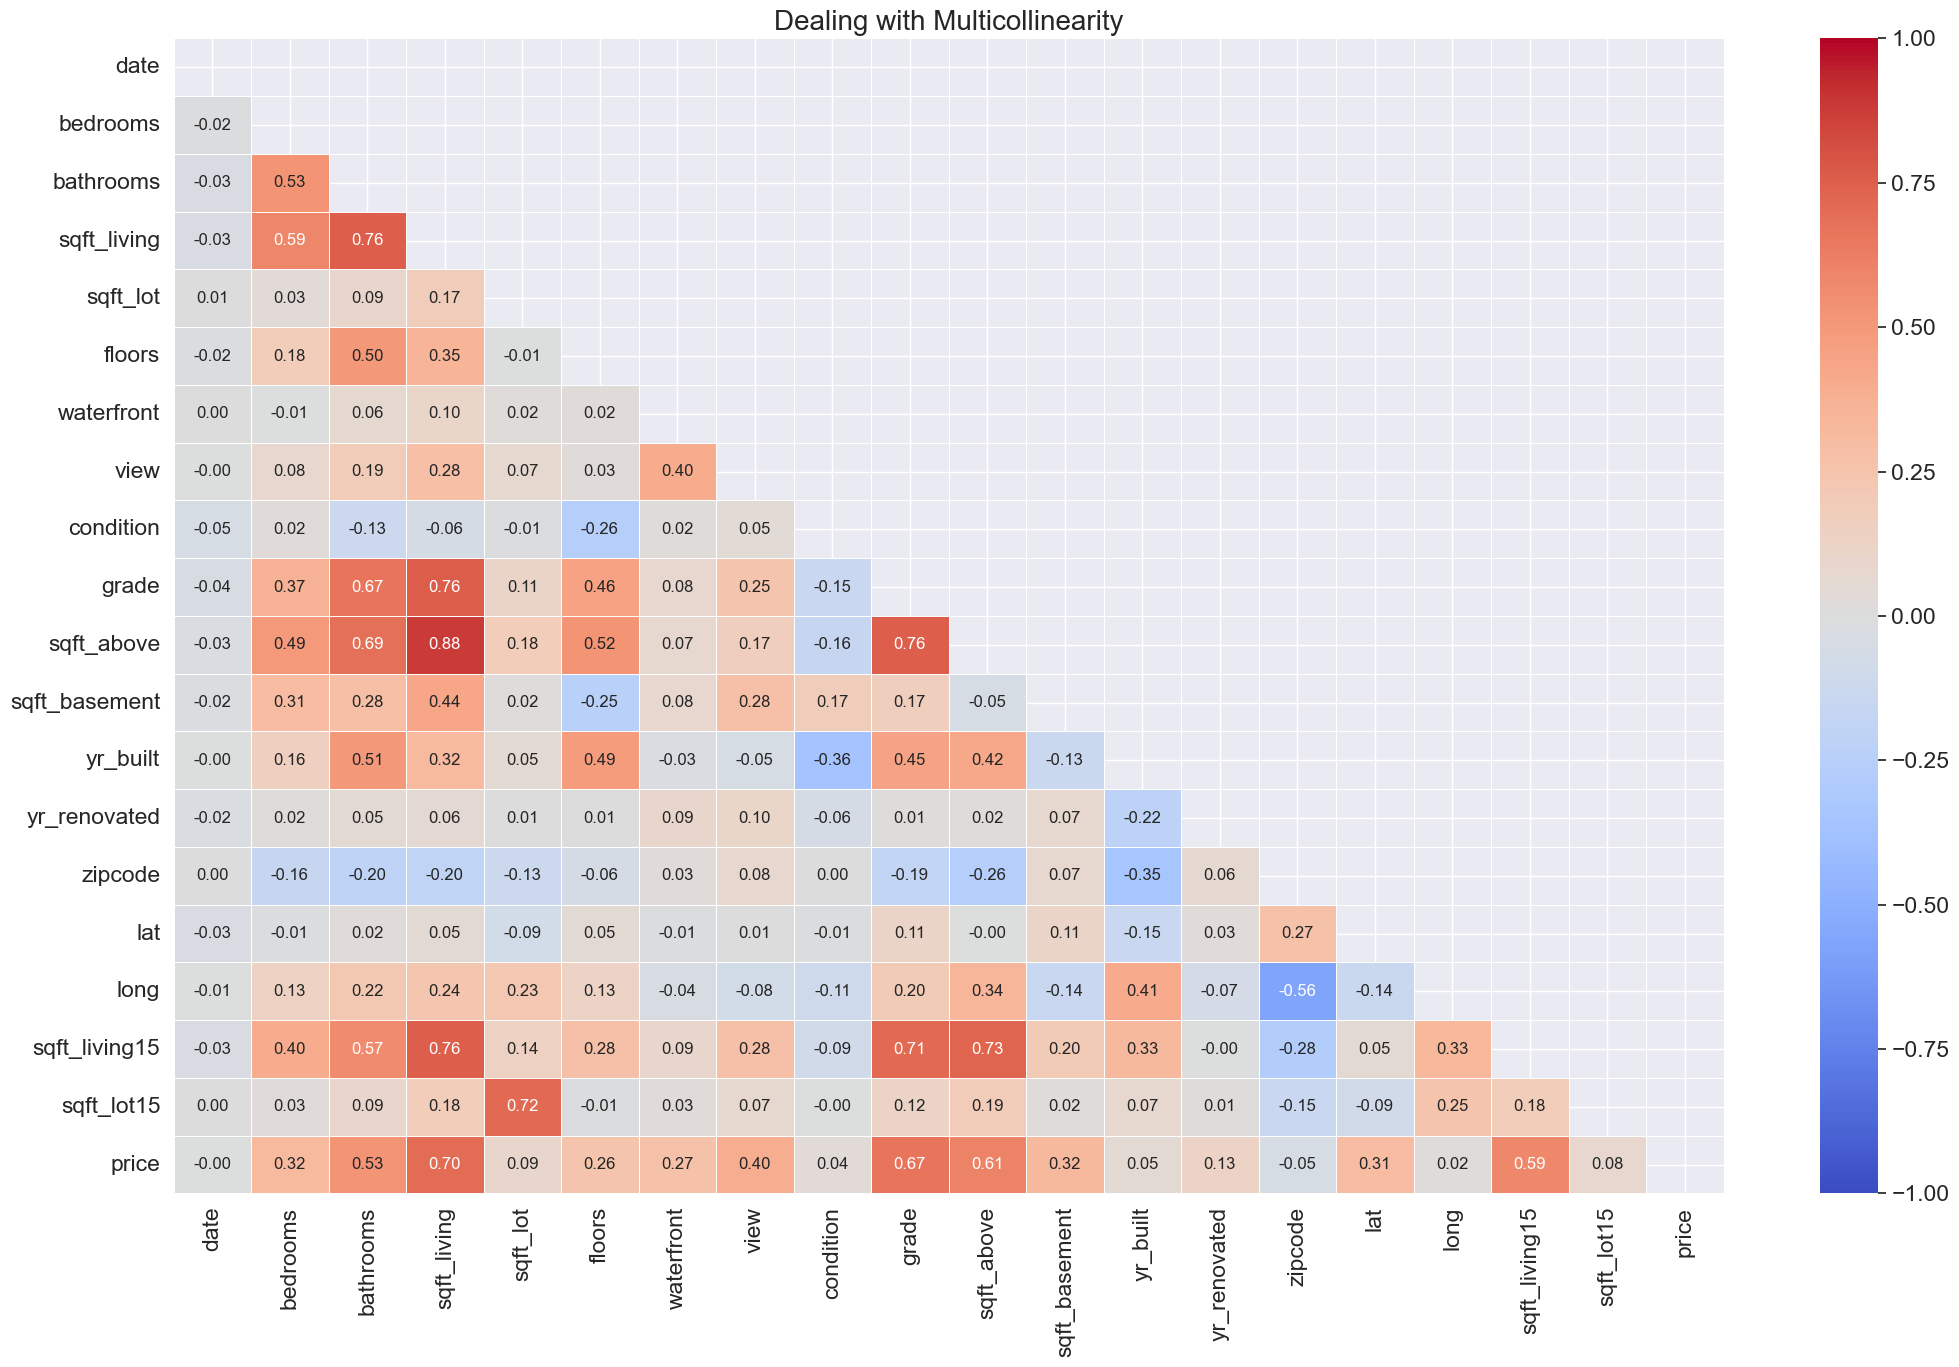

In [265]:
num_corr2= df2.corr()
# CSacamos el mapa de calor de las correlaciones
mask = np.zeros_like(num_corr2)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr2, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax, vmin=-1, vmax=1) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

In [266]:
df2.drop(columns="sqft_above", inplace=True)

In [267]:
list(df2)

['date',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'price']

In [268]:
df2

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,,,
7129300520,735519,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
6414100192,735576,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
5631500400,735654,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
2487200875,735576,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
1954400510,735647,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,735374,3,2.50,1530,1131,3.0,0,0,3,8,0,2009,0,98103,47.6993,-122.346,1530,1509,360000.0
6600060120,735652,4,2.50,2310,5813,2.0,0,0,3,8,0,2014,0,98146,47.5107,-122.362,1830,7200,400000.0
1523300141,735407,2,0.75,1020,1350,2.0,0,0,3,7,0,2009,0,98144,47.5944,-122.299,1020,2007,402101.0


In [269]:
#df2.drop(columns=["sqft_above"], inplace=True)

<h1 style="color: #FF8C00;">Re-trying</h1>

In [270]:
X_new = df2.drop("price", axis=1)
y_new = df2["price"]

In [271]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.3, random_state=42)

<h2 style="color: #FF6347;">Selecting the Model: Linear Regression</h2>

In [272]:
model2 = LinearRegression()
model2.fit(X_new_train, y_new_train)

LinearRegression()

<h2 style="color: #FF6347;">Model Validation</h2>

In [273]:
predictions2 = model2.predict(X_new_test)

In [274]:
print(f'30% for test prediction data: {len(predictions2)}.')

30% for test prediction data: 6482.


<h3 style="color: #FF6347;">Metrics</h3>

In [275]:
r22 = r2_score(y_new_test, predictions2)
RMSE2 = root_mean_squared_error(y_new_test, predictions2)
MSE2 = mean_squared_error(y_new_test, predictions2)
MAE2 = mean_absolute_error(y_new_test, predictions2)

In [276]:
#Printing the results
print("R2 = ", round(r22, 4))
print("RMSE = ", round(RMSE2, 4))
print("The value of the metric MSE is ", round(MSE2, 4))
print("MAE = ", round(MAE2, 4))

R2 =  0.7034
RMSE =  206688.5095
The value of the metric MSE is  42720139963.0919
MAE =  126068.9417


<h2 style="color: #FF6347;">Selecting the Model: Ridge Regression</h2>

In [277]:
ridge2 = Ridge()
ridge2.fit(X_new_train, y_new_train)

Ridge()

<h2 style="color: #FF6347;">Model Validation</h2>

In [278]:
predictions_ridge2 = ridge2.predict(X_new_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [279]:
r2_ridge2 = r2_score(y_new_test, predictions_ridge2)
RMSE_ridge2 = root_mean_squared_error(y_new_test, predictions_ridge2)
MSE_ridge2 = mean_squared_error(y_new_test, predictions_ridge2)
MAE_ridge2 = mean_absolute_error(y_new_test, predictions_ridge2)

In [280]:
#Printing the results
print("R2 = ", round(r2_ridge2, 4))
print("RMSE = ", round(RMSE_ridge2, 4))
print("The value of the metric MSE is ", round(MSE_ridge2, 4))
print("MAE = ", round(MAE_ridge2, 4))

R2 =  0.7034
RMSE =  206712.8477
The value of the metric MSE is  42730201408.0752
MAE =  126042.2863


<h2 style="color: #FF6347;">Selecting the Model: Lasso Regression</h2>

In [281]:
lasso2 = Lasso()
lasso2.fit(X_new_train, y_new_train)

Lasso()

<h2 style="color: #FF6347;">Model Validation</h2>

In [282]:
predictions_lasso2 = lasso2.predict(X_new_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [283]:
r2_lasso2 = r2_score(y_new_test, predictions_lasso2)
RMSE_lasso2 = root_mean_squared_error(y_new_test, predictions_lasso2)
MSE_lasso2 = mean_squared_error(y_new_test, predictions_lasso2)
MAE_lasso2 = mean_absolute_error(y_new_test, predictions_lasso2)

In [284]:
#Printing the results
print("R2 = ", round(r2_lasso2, 4))
print("RMSE = ", round(RMSE_lasso2, 4))
print("The value of the metric MSE is ", round(MSE_lasso2, 4))
print("MAE = ", round(MAE_lasso2, 4))

R2 =  0.7034
RMSE =  206689.2972
The value of the metric MSE is  42720465568.8942
MAE =  126067.8812


<h2 style="color: #FF6347;">Selecting the Model: Decision Tree Regression</h2>

In [285]:
tree2 = DecisionTreeRegressor()
tree2.fit(X_new_train, y_new_train)

DecisionTreeRegressor()

<h2 style="color: #FF6347;">Model Validation</h2>

In [286]:
predictions_tree2 = tree2.predict(X_new_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [287]:
r2_tree2 = r2_score(y_new_test, predictions_tree2)
RMSE_tree2 = root_mean_squared_error(y_new_test, predictions_tree2)
MSE_tree2 = mean_squared_error(y_new_test, predictions_tree2)
MAE_tree2 = mean_absolute_error(y_new_test, predictions_tree2)

In [288]:
#Printing the results
print("R2 = ", round(r2_tree2, 4))
print("RMSE = ", round(RMSE_tree2, 4))
print("The value of the metric MSE is ", round(MSE_tree2, 4))
print("MAE = ", round(MAE_tree2, 4))

R2 =  0.7673
RMSE =  183102.0649
The value of the metric MSE is  33526366172.7936
MAE =  100738.4869


<h2 style="color: #FF6347;">Selecting the Model: KNN Regression</h2>

In [289]:
knn2 = KNeighborsRegressor()
knn2.fit(X_new_train, y_new_train)

KNeighborsRegressor()

<h2 style="color: #FF6347;">Model Validation</h2>

In [290]:
predictions_knn2 = knn2.predict(X_new_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [291]:
r2_knn2 = r2_score(y_new_test, predictions_knn2)
RMSE_knn2 = root_mean_squared_error(y_new_test, predictions_knn2)
MSE_knn2 = mean_squared_error(y_new_test, predictions_knn2)
MAE_knn2 = mean_absolute_error(y_new_test, predictions_knn2)

In [292]:
#Printing the results
print("R2 = ", round(r2_knn2, 4))
print("RMSE = ", round(RMSE_knn2, 4))
print("The value of the metric MSE is ", round(MSE_knn2, 4))
print("MAE = ", round(MAE_knn2, 4))

R2 =  0.4638
RMSE =  277924.3834
The value of the metric MSE is  77241962894.3858
MAE =  160126.6515


<h2 style="color: #FF6347;">Selecting the Model: XGBoost Regression</h2>

In [293]:
xgbr2 = xgb.XGBRFRegressor()
xgbr2.fit(X_new_train, y_new_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

<h2 style="color: #FF6347;">Model Validation</h2>

In [294]:
predictions_xgb2 = xgbr2.predict(X_new_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [295]:
r2_xgb2 = r2_score(y_new_test, predictions_xgb2)
RMSE_xgb2 = root_mean_squared_error(y_new_test, predictions_xgb2)
MSE_xgb2 = mean_squared_error(y_new_test, predictions_xgb2)
MAE_xgb2 = mean_absolute_error(y_new_test, predictions_xgb2)

In [296]:
#Printing the results
print("R2 = ", round(r2_xgb2, 4))
print("RMSE = ", round(RMSE_xgb2, 4))
print("The value of the metric MSE is ", round(MSE_xgb2, 4))
print("MAE = ", round(MAE_xgb2, 4))

R2 =  0.818
RMSE =  161918.8876
The value of the metric MSE is  26217726173.9994
MAE =  92051.2369


<h2 style="color: #FF6347;">Final Comparision?</h2>

In [297]:
metrics2 = {
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 'KNN', 'XGBoost'],
    'R²': [r2, r2_ridge, r2_lasso, r2_tree, r2_knn, r2_xgb],
    'R²_new': [r22, r2_ridge2, r2_lasso2, r2_tree2, r2_knn2, r2_xgb2],
    'RMSE': [RMSE, RMSE_ridge, RMSE_lasso, RMSE_tree, RMSE_knn, RMSE_xgb],
    'RMSE_new': [RMSE2, RMSE_ridge2, RMSE_lasso2, RMSE_tree2, RMSE_knn2, RMSE_xgb2],
    'MSE': [MSE, MSE_ridge, MSE_lasso, MSE_tree, MSE_knn, MSE_xgb],
    'MSE_new': [MSE2, MSE_ridge2, MSE_lasso2, MSE_tree2, MSE_knn2, MSE_xgb2],
    'MAE': [MAE, MAE_ridge, MAE_lasso, MAE_tree, MAE_knn, MAE_xgb],
    'MAE_new': [MAE2, MAE_ridge2, MAE_lasso2, MAE_tree2, MAE_knn2, MAE_xgb2]
}

In [298]:
df_metrics2 = round(pd.DataFrame(metrics2),4)
df_metrics2.set_index("Model")

,R²,R²_new,RMSE,RMSE_new,MSE,MSE_new,MAE,MAE_new
Model,,,,,,,,
Linear Regression,0.7005,0.7034,207924.9949,206688.5095,4.323280e+10,4.272014e+10,127181.9958,126068.9417
Ridge,0.7004,0.7034,207957.9979,206712.8477,4.324653e+10,4.273020e+10,127177.6053,126042.2863
Lasso,0.7005,0.7034,207926.1668,206689.2972,4.323329e+10,4.272047e+10,127181.6045,126067.8812
Decision Tree,0.7122,0.7673,203821.6387,183102.0649,4.154326e+10,3.352637e+10,104270.2465,100738.4869
KNN,0.4929,0.4638,270560.2357,277924.3834,7.320284e+10,7.724196e+10,164973.8322,160126.6515
XGBoost,0.7662,0.8180,183729.2413,161918.8876,3.375643e+10,2.621773e+10,100045.1877,92051.2369


In [299]:
df_metrics2.T

,0,1,2,3,4,5
Model,Linear Regression,Ridge,Lasso,Decision Tree,KNN,XGBoost
R²,0.7005,0.7004,0.7005,0.7122,0.4929,0.7662
R²_new,0.7034,0.7034,0.7034,0.7673,0.4638,0.818
RMSE,207924.9949,207957.9979,207926.1668,203821.6387,270560.2357,183729.2413
RMSE_new,206688.5095,206712.8477,206689.2972,183102.0649,277924.3834,161918.8876
MSE,43232803513.073502,43246528909.509201,43233290837.295998,41543260384.910202,73202841141.865997,33756434106.178902
MSE_new,42720139963.091904,42730201408.075203,42720465568.894203,33526366172.793598,77241962894.385803,26217726173.999401
MAE,127181.9958,127177.6053,127181.6045,104270.2465,164973.8322,100045.1877
MAE_new,126068.9417,126042.2863,126067.8812,100738.4869,160126.6515,92051.2369


In [300]:
#Quitando sqft_above, la linea de 33 habitaciones y los que tenian 0 hab y 0 baños

#prueba1 = df_metrics2.T
#prueba1

# Metodo Fer

In [301]:
import sys
sys.path.append(r"C:\Users\FernandoSanz-Extreme\OneDrive - AMCHOR INVESTMENT STRATEGIES SGIIC, S.A\Escritorio\Ironhack\DATA_OCT24_MAD")
from functions import *

In [304]:
df3 = df.copy()

In [305]:
base_model = evaluate_regresion_model(df3, "price")
base_model.T

,R²,RMSE,MSE,MAE
Model,,,,
Linear Regression,0.7005,207924.9949,4.323280e+10,127181.9958
Ridge,0.7004,207957.9979,4.324653e+10,127177.6053
Lasso,0.7005,207926.1668,4.323329e+10,127181.6045
Decision Tree,0.7364,195075.5734,3.805448e+10,101954.9429
KNN,0.4929,270560.2357,7.320284e+10,164973.8322
XGBoost,0.8665,138835.0156,1.927516e+10,71109.5985
